#  IA para Redes de Suministro 

👤 **Autor:** John Leonardo Vargas Mesa  
🔗 [LinkedIn](https://www.linkedin.com/in/leonardovargas/) | [GitHub](https://github.com/LeStark)  

## 📂 Repositorio en GitHub  
- 📓 **Notebooks:** [Acceder aquí](https://github.com/LeStark/Cursos/tree/main/02%20-%20IA4SC)  
- 📑 **Data sets:** [Acceder aquí](https://github.com/LeStark/Cursos/tree/main/00%20-%20Data/02%20-%20SC)  
---

# 📘 Notebook 5 – Introducción a Natural Lenguage Processing para redes de suministro

In [2]:
# Instala las bibliotecas necesarias si no las tienes instaladas
!pip install pandas scikit-learn nltk spacy matplotlib seaborn imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached cloudpathlib-0.22.0-py3-none-any.whl.metadata (16 kB)
   ---------------------------------------- 0.0/13.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.8/13.9 MB 9.1 MB/s eta 0:00:02
   ---------- ----------------------------- 3.7/13.9 MB 9.9 MB/s eta 0:00:02
   ------------ ----------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.32.1 which is incompatible.


In [4]:
!pip install "numpy<2"

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.32.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [7]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------ --------------------------------- 2.1/12.8 MB 13.1 MB/s eta 0:00:01
     -------------- ------------------------- 4.7/12.8 MB 11.9 MB/s eta 0:00:01
     ---------------------- ----------------- 7.1/12.8 MB 11.8 MB/s eta 0:00:01
     ------------------------------ --------- 9.7/12.8 MB 11.8 MB/s eta 0:00:01
     ----------------------------------- --- 11.5/12.8 MB 10.9 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 10.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler


# Descargar recursos necesarios (solo la primera vez)
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jlvar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jlvar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jlvar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jlvar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jlvar\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
url = "https://raw.githubusercontent.com/LeStark/Cursos/refs/heads/main/00%20-%20Data/03%20-%20NLP/amazon_reviews.csv"
df = pd.read_csv(url)
df.head(10)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.000000
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.000000
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.000000
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.000000
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.000000
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.000000
6,6,2K1Toaster,5.0,I have it in my phone and it never skips a bea...,2013-10-19,415,0,0,0,0,0.0,0.000000
7,7,"35-year Technology Consumer ""8-tracks to 802.11""",5.0,It's hard to believe how affordable digital ha...,2014-10-07,62,0,0,0,0,0.0,0.000000
8,8,4evryoung,5.0,Works in a HTC Rezound. Was running short of ...,2014-03-24,259,1,0,1,1,1.0,0.206549
9,9,53rdcard,5.0,"in my galaxy s4, super fast card, and am total...",2013-11-10,393,0,0,0,0,0.0,0.000000


In [3]:
amazon_reviews = df[["reviewText", "overall"]]
amazon_reviews.head()

,reviewText,overall
0,No issues.,4.0
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0


In [4]:
# --- Conversión de 'overall' a etiquetas de sentimiento ---
def get_sentiment(score):
    if score >= 4:
        return "positive"
    elif score <= 2:
        return "negative"
    else:
        return "neutral"

# Crear la nueva columna
amazon_reviews["sentiment"] = amazon_reviews["overall"].apply(get_sentiment)

# Mostrar una muestra
amazon_reviews.head()


C:\Users\jlvar\AppData\Local\Temp\ipykernel_40184\307314063.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_reviews["sentiment"] = amazon_reviews["overall"].apply(get_sentiment)


,reviewText,overall,sentiment
0,No issues.,4.0,positive
1,"Purchased this for my device, it worked as adv...",5.0,positive
2,it works as expected. I should have sprung for...,4.0,positive
3,This think has worked out great.Had a diff. br...,5.0,positive
4,"Bought it with Retail Packaging, arrived legit...",5.0,positive


In [5]:
from sklearn.preprocessing import LabelEncoder

# --- Codificar la columna 'sentiment' ---
le = LabelEncoder()

# Ajustar el codificador y transformar la columna
amazon_reviews["sentiment_encoded"] = le.fit_transform(amazon_reviews["sentiment"])

# Mostrar cómo se asignaron los valores
for clase, codigo in zip(le.classes_, range(len(le.classes_))):
    print(f"{clase}: {codigo}")

# Vista rápida del DataFrame
amazon_reviews.head()


negative: 0
neutral: 1
positive: 2


C:\Users\jlvar\AppData\Local\Temp\ipykernel_40184\1688125805.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_reviews["sentiment_encoded"] = le.fit_transform(amazon_reviews["sentiment"])


,reviewText,overall,sentiment,sentiment_encoded
0,No issues.,4.0,positive,2
1,"Purchased this for my device, it worked as adv...",5.0,positive,2
2,it works as expected. I should have sprung for...,4.0,positive,2
3,This think has worked out great.Had a diff. br...,5.0,positive,2
4,"Bought it with Retail Packaging, arrived legit...",5.0,positive,2


C:\Users\jlvar\AppData\Local\Temp\ipykernel_40184\3188593547.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["red", "gray", "green"])


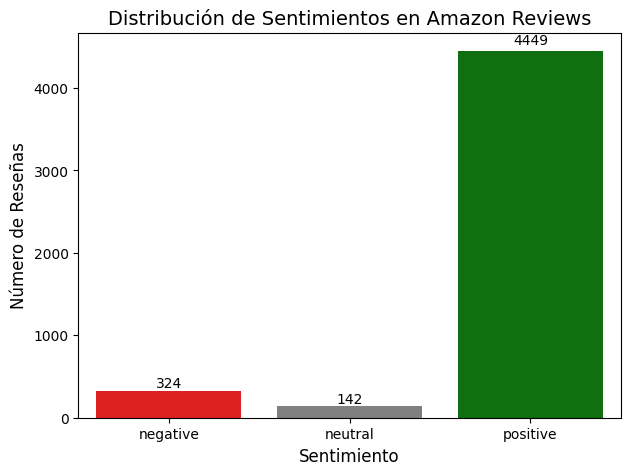

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar cuántas reseñas hay por sentimiento
sentiment_counts = amazon_reviews["sentiment"].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(7,5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["red", "gray", "green"])

# Etiquetas y título
plt.title("Distribución de Sentimientos en Amazon Reviews", fontsize=14)
plt.xlabel("Sentimiento", fontsize=12)
plt.ylabel("Número de Reseñas", fontsize=12)

# Mostrar los valores encima de cada barra
for i, value in enumerate(sentiment_counts.values):
    plt.text(i, value + (value*0.01), str(value), ha="center", va="bottom", fontsize=10)

plt.show()


In [8]:
# --- Librerías necesarias ---
import re
import nltk
import spacy
from nltk.corpus import stopwords

# Descargar recursos necesarios (solo la primera vez)
nltk.download('stopwords')
nltk.download('punkt')
nlp = spacy.load("en_core_web_sm")

# Lista de stopwords en inglés
stop_words = set(stopwords.words("english"))

# --- Función de preprocesamiento ---
def preprocess_text(text):
    # 1️ Pasar a minúsculas
    text = text.lower()
    
    # 2️ Eliminar URLs, menciones, signos y números
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # URLs
    text = re.sub(r"[^a-z\s]", "", text)                 # Caracteres no alfabéticos
    
    # 3️ Tokenización (dividir en palabras)
    tokens = nltk.word_tokenize(text)
    
    # 4️ Eliminar stopwords
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    # 5️ Lematización con spaCy
    doc = nlp(" ".join(tokens))
    lemmas = [token.lemma_ for token in doc]
    
    # 6️ Reconstruir el texto limpio
    return " ".join(lemmas)

# Aplicar al DataFrame (esto puede tardar si el dataset es grande)
amazon_reviews["clean_text"] = amazon_reviews["reviewText"].astype(str).apply(preprocess_text)

# Ver los resultados
amazon_reviews[["reviewText", "clean_text"]].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jlvar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jlvar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\jlvar\AppData\Local\Temp\ipykernel_40184\235172198.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_reviews["clean_text"] = amazon_reviews["reviewText"].astype(str).apply(preprocess_text)


,reviewText,clean_text
0,No issues.,issue
1,"Purchased this for my device, it worked as adv...",purchase device work advertise never much phon...
2,it works as expected. I should have sprung for...,work expect sprung high capacity think make bi...
3,This think has worked out great.Had a diff. br...,think work greathad diff bran card go south mo...
4,"Bought it with Retail Packaging, arrived legit...",buy retail packaging arrive legit orange envel...


🔹 Distribución balanceada:
sentiment
negative    324
positive    324
neutral     324
Name: count, dtype: int64


C:\Users\jlvar\AppData\Local\Temp\ipykernel_40184\3317944712.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=amazon_reviews_balanced, palette=["red", "gray", "green"])


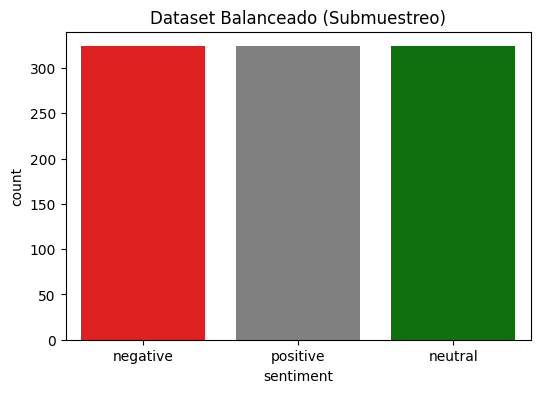

In [20]:
# Cantidad mínima entre clases (usaremos la de 'negative')
min_count = amazon_reviews["sentiment"].value_counts()["negative"]

# Separar por clase
df_pos = amazon_reviews[amazon_reviews["sentiment"] == "positive"].sample(n=min_count, random_state=42)
df_neu = amazon_reviews[amazon_reviews["sentiment"] == "neutral"].sample(n=min_count, random_state=42, replace=True)  # opcional: con reemplazo si hay pocas
df_neg = amazon_reviews[amazon_reviews["sentiment"] == "negative"]

# Unir los subconjuntos balanceados
amazon_reviews_balanced = pd.concat([df_pos, df_neu, df_neg], axis=0).sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar el nuevo balance
print("🔹 Distribución balanceada:")
print(amazon_reviews_balanced["sentiment"].value_counts())

# (Opcional) Visualizar
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x="sentiment", data=amazon_reviews_balanced, palette=["red", "gray", "green"])
plt.title("Dataset Balanceado (Submuestreo)")
plt.show()


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear el vectorizador
vectorizer = TfidfVectorizer(max_features=1000)  # puedes ajustar el número de características

# Ajustar y transformar el texto limpio
X = vectorizer.fit_transform(amazon_reviews_balanced["clean_text"])

# Variable objetivo
y = amazon_reviews_balanced["sentiment_encoded"]

In [22]:
import pandas as pd
import numpy as np

# Elegir un índice aleatorio o fijo para mostrar
idx = np.random.randint(0, X.shape[0])

# Texto original y limpio
print("🔹 Review original:")
print(amazon_reviews.loc[idx, "reviewText"])
print("\n🔹 Texto preprocesado:")
print(amazon_reviews.loc[idx, "clean_text"])
print("\n🔹 Sentimiento:", amazon_reviews.loc[idx, "sentiment"])

# Obtener las palabras del vocabulario
feature_names = vectorizer.get_feature_names_out()

# Convertir el vector a un DataFrame legible
vector_df = pd.DataFrame(
    X[idx].toarray().flatten(),
    index=feature_names,
    columns=["TF-IDF Value"]
)

# Mostrar solo las palabras con peso no cero
vector_df = vector_df[vector_df["TF-IDF Value"] > 0].sort_values(by="TF-IDF Value", ascending=False)

print("\n🔹 Palabras más relevantes en este review:")
display(vector_df.head(15))


🔹 Review original:
I use this on my Galaxy S3 and Sony Action Cam, and it works perfectly, never had any issues with it and i find that for any action cam this is a pretty solid sorage ammount.

🔹 Texto preprocesado:
use galaxy sony action cam work perfectly never issue find action cam pretty solid sorage ammount

🔹 Sentimiento: positive

🔹 Palabras más relevantes en este review:


,TF-IDF Value
machine,0.506087
mistake,0.442890
mine,0.357275
make,0.281929
much,0.275607
still,0.259236
even,0.232431
say,0.223123
good,0.212523
sandisk,0.169623


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

              precision    recall  f1-score   support

    negative       0.78      0.78      0.78        65
     neutral       0.74      0.74      0.74        65
    positive       0.83      0.83      0.83        65

    accuracy                           0.78       195
   macro avg       0.78      0.78      0.78       195
weighted avg       0.78      0.78      0.78       195



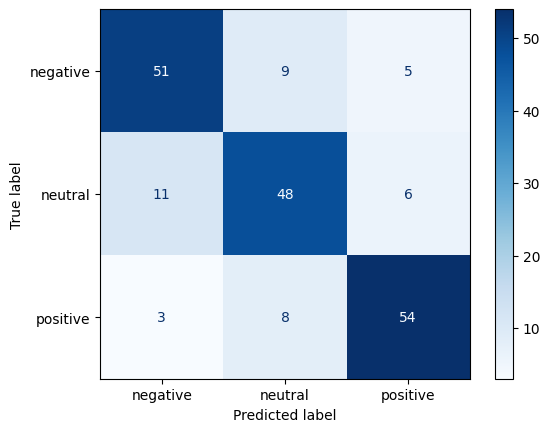

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predicciones
y_pred = model.predict(X_test)

# Reporte de métricas
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.show()

In [32]:
reseña_1 = "I bought 2 of those SanDisk 32 GB microSD , used them on my Galaxy Note and Galaxy S4First one , my phone started saying it was removed , then recognize it again :) then diedI thought it's just a luck , plugged in the 2nd one :) stayed for about 2 months and died suddenly ! and lost everythingnever buying from SanDisk again .. ever"
reseña_2 = "This product is amazing, I totally recommend it!"
nuevo_texto = [reseña_2]
nuevo_texto_limpio = [preprocess_text(t) for t in nuevo_texto]
nuevo_vector = vectorizer.transform(nuevo_texto_limpio)
pred = model.predict(nuevo_vector)
print("Predicción:", le.inverse_transform(pred)[0])

Predicción: positive


I bought 2 of those SanDisk 32 GB microSD , used them on my Galaxy Note and Galaxy S4First one , my phone started saying it was removed , then recognize it again :) then diedI thought it's just a luck , plugged in the 2nd one :) stayed for about 2 months and died suddenly ! and lost everythingnever buying from SanDisk again .. ever
